<h2>Chapter7 目次</h2>

- [60. KVSの構築](#prob60)
- [61. KVSの検索](#prob61)
- [62. KVS内の反復処理](#prob62)
- [63. オブジェクトを値に格納したKVS](#prob63)
- [64. MongoDBの構築](#prob64)
- [65. MongoDBの検索](#prob65)
- [66. 検索件数の取得](#prob66)
- [67. 複数のドキュメントの取得](#prob67)
- [68. ソート](#prob68)
- [69. Webアプリケーションの作成](#prob69)

In [1]:
!wget -NP ./data/ http://www.cl.ecei.tohoku.ac.jp/nlp100/data/artist.json.gz

--2018-06-24 15:58:07--  http://www.cl.ecei.tohoku.ac.jp/nlp100/data/artist.json.gz
www.cl.ecei.tohoku.ac.jp (www.cl.ecei.tohoku.ac.jp) をDNSに問いあわせています... 130.34.192.83
www.cl.ecei.tohoku.ac.jp (www.cl.ecei.tohoku.ac.jp)|130.34.192.83|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 49275855 (47M) [application/x-gzip]
`./data/artist.json.gz' に保存中

artist.json.gz      100%[===================>]  46.99M  3.05MB/s 時間 17s      

2018-06-24 15:58:25 (2.69 MB/s) - `./data/artist.json.gz' へ保存完了 [49275855/49275855]



In [2]:
!gunzip ./data/artist.json.gz

gzip: ./data/artist.json already exists; do you wish to overwrite (y or n)? ^C


In [3]:
!cat ./data/artist.json 2>/dev/null | head

{"name": "WIK▲N", "tags": [{"count": 1, "value": "sillyname"}], "sort_name": "WIK▲N", "ended": true, "gid": "8972b1c1-6482-4750-b51f-596d2edea8b1", "id": 805192}
{"name": "Gustav Ruppke", "sort_name": "Gustav Ruppke", "ended": true, "gid": "b4f76788-7e6f-41b7-ac7b-dfb67f66282e", "type": "Person", "id": 578352}
{"name": "Pete Moutso", "sort_name": "Moutso, Pete", "ended": true, "gid": "49add228-eac5-4de8-836c-d75cde7369c3", "type": "Person", "id": 371203}
{"ended": true, "gid": "c112a400-af49-4665-8bba-741531d962a1", "sort_name": "Zachary", "id": 273232, "name": "Zachary"}
{"name": "The High Level Ranters", "sort_name": "High Level Ranters, The", "ended": true, "gid": "c42eed94-e233-44e2-82b8-3ed6dd9bf318", "type": "Group", "id": 153193}
{"begin": {"year": 1956}, "end": {"year": 1993}, "name": "The Silhouettes", "area": "United States", "sort_name": "Silhouettes, The", "ended": true, "gid": "ca3f3ee1-c4a7-4bac-a16a-0b888a396c6b", "type": "Group", "id": 101060, "aliases": [{"name": "Silh

- brew install leveldb
- pip install plyvelを実行

In [19]:
import plyvel
dir(plyvel)

['CorruptionError',
 'DB',
 'Error',
 'IOError',
 'IteratorInvalidError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__leveldb_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_plyvel',
 '_version',
 'destroy_db',
 'repair_db']

In [2]:
plyvel.DB?

Init signature: plyvel.DB(self, /, *args, **kwargs)
Docstring:      DB(name, bool create_if_missing=False, *, bool error_if_exists=False, paranoid_checks=None, write_buffer_size=None, max_open_files=None, lru_cache_size=None, block_size=None, block_restart_interval=None, max_file_size=None, compression='snappy', int bloom_filter_bits=0, comparator=None, bytes comparator_name=None)
File:           ~/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/plyvel/_plyvel.cpython-36m-darwin.so
Type:           type


<a name = 'prob60'></a>
# 60. KVSの構築

Key-Value-Store (KVS) を用い，アーティスト名（name）から活動場所（area）を検索するためのデータベースを構築せよ．

事前にstrip()をかける方が安全

In [21]:
import json

db_area = plyvel.DB('./work/area.ldb', create_if_missing=True)
with open('./data/artist.json') as data:
    for line in data:
        line = line.strip()
        info = json.loads(line)
        
        if info.get('area'):
            db_area.put(info['name'].encode('utf-8'), info['area'].encode('utf-8'))
    
count = sum(1 for _ in db_area)
print('{}件 登録'.format(count))
db_area.close()

864789件 登録


<a name = 'prob61'></a>
# 61. KVSの検索

60で構築したデータベースを用い，特定の（指定された）アーティストの活動場所を取得せよ．

jupyterあげるとinputしたartist nameが見えない??

In [22]:
db_area = plyvel.DB('./work/area.ldb', create_if_missing=True)
artist_name = input('artist name?: ')
val = db_area.get(artist_name.encode('utf-8')).decode('utf-8')
print(val)
    
db_area.close()

artist name?:  Oasis


United Kingdom


<a name = 'prob62'></a>
# 62. KVS内の反復処理

60で構築したデータベースを用い，活動場所が「Japan」となっているアーティスト数を求めよ．

In [23]:
db_area = plyvel.DB('./work/area.ldb', create_if_missing=True)
count_jp = sum(1 for _, val in db_area if val.decode('utf-8') == 'Japan')

db_area.close()
    
print(count_jp)

22128


<a name = 'prob63'></a>
# 63. オブジェクトを値に格納したKVS

KVSを用い，アーティスト名（name）からタグと被タグ数（タグ付けされた回数）のリストを検索するためのデータベースを構築せよ．
さらに，ここで構築したデータベースを用い，アーティスト名からタグと被タグ数を検索せよ．

In [24]:
import pickle

db_tags = plyvel.DB('./work/tags.ldb', create_if_missing=True)

with open('./data/artist.json') as data:
    for line in data:
        info = json.loads(line)
        
        if info.get('tags'):
            db_tags.put(info['name'].encode('utf-8'), pickle.dumps(info['tags']))

count = sum(1 for _ in db_tags)
print('{}件 登録'.format(count))
db_tags.close()

864789件 登録


In [25]:
db_tags = plyvel.DB('./work/tags.ldb', create_if_missing=True)
artist_name = input('artist name?: ')
tags = pickle.loads(db_tags.get(artist_name.encode('utf-8')))
for tag in tags:
    print(tag['value'], tag['count'], sep=' : ')
    
db_tags.close()

artist name?:  Oasis


rock : 1
britpop : 3
british : 4
uk : 1
britannique : 1
rock and indie : 1
england : 1
manchester : 1


<a name = 'prob64'></a>
# 64. MongoDBの構築

アーティスト情報（artist.json.gz）をデータベースに登録せよ．
さらに，次のフィールドでインデックスを作成せよ: name, aliases.name, tags.value, rating.value

In [1]:
!brew services start mongodb

==> Successfully started `mongodb` (label: homebrew.mxcl.mongodb)


In [34]:
import json

In [35]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)

# artists_dbという名前のデータベースを作成
db = client.artists_db
col = db.artists_col

with open('./data/artist.json') as data:
    col.insert_many(json.loads(line) for line in data)       
        
col.create_index('name')
col.create_index('aliases.name')
col.create_index('tags.value')
col.create_index('rating.value')

'rating.value_1'

In [7]:
print(col.count())

921337


/Users/r-fujii/.pyenv/versions/anaconda3-5.0.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


<a name = 'prob65'></a>
# 65. MongoDBの検索

MongoDBのインタラクティブシェルを用いて，"Queen"というアーティストに関する情報を取得せよ．さらに，これと同様の処理を行うプログラムを実装せよ．

In [36]:
from pprint import pprint
for data in col.find({'name':'Queen'}):
    pprint(data)

{'_id': ObjectId('5bce89ff28ce7b413e372c0c'),
 'aliases': [{'name': 'Queen', 'sort_name': 'Queen'}],
 'area': 'Japan',
 'ended': True,
 'gender': 'Female',
 'gid': '420ca290-76c5-41af-999e-564d7c71f1a7',
 'id': 701492,
 'name': 'Queen',
 'sort_name': 'Queen',
 'tags': [{'count': 1, 'value': 'kamen rider w'},
          {'count': 1, 'value': 'related-akb48'}],
 'type': 'Character'}
{'_id': ObjectId('5bce8a0028ce7b413e37f2b8'),
 'aliases': [{'name': '女王', 'sort_name': '女王'}],
 'area': 'United Kingdom',
 'begin': {'date': 27, 'month': 6, 'year': 1970},
 'ended': True,
 'gid': '0383dadf-2a4e-4d10-a46a-e9e041da8eb3',
 'id': 192,
 'name': 'Queen',
 'rating': {'count': 24, 'value': 92},
 'sort_name': 'Queen',
 'tags': [{'count': 2, 'value': 'hard rock'},
          {'count': 1, 'value': '70s'},
          {'count': 1, 'value': 'queen family'},
          {'count': 1, 'value': '90s'},
          {'count': 1, 'value': '80s'},
          {'count': 1, 'value': 'glam rock'},
          {'count': 4, 'valu

In [37]:
%%bash
mongo
use artists_db
db.stats()
db.artists_col.find({name:'Queen'})

MongoDB shell version v4.0.2
connecting to: mongodb://127.0.0.1:27017
MongoDB server version: 4.0.2
switched to db artists_db
{
	"db" : "artists_db",
	"collections" : 1,
	"views" : 0,
	"objects" : 921337,
	"avgObjSize" : 189.68956201693842,
	"dataSize" : 174768012,
	"storageSize" : 71114752,
	"numExtents" : 0,
	"indexes" : 5,
	"indexSize" : 37351424,
	"fsUsedSize" : 158770970624,
	"fsTotalSize" : 250790436864,
	"ok" : 1
}
{ "_id" : ObjectId("5bce89ff28ce7b413e372c0c"), "name" : "Queen", "area" : "Japan", "gender" : "Female", "tags" : [ { "count" : 1, "value" : "kamen rider w" }, { "count" : 1, "value" : "related-akb48" } ], "sort_name" : "Queen", "ended" : true, "gid" : "420ca290-76c5-41af-999e-564d7c71f1a7", "type" : "Character", "id" : 701492, "aliases" : [ { "name" : "Queen", "sort_name" : "Queen" } ] }
{ "_id" : ObjectId("5bce8a0028ce7b413e37f2b8"), "rating" : { "count" : 24, "value" : 92 }, "begin" : { "date" : 27, "month" : 6, "year" : 1970 }, "name" : "Queen", "area" : "United K

<a name = 'prob66'></a>
# 66. 検索件数の取得

MongoDBのインタラクティブシェルを用いて，活動場所が「Japan」となっているアーティスト数を求めよ．

In [38]:
%%bash
mongo
use artists_db
db.artists_col.find({area:'Japan'}).count()

MongoDB shell version v4.0.2
connecting to: mongodb://127.0.0.1:27017
MongoDB server version: 4.0.2
switched to db artists_db
22821
bye


<a name = 'prob67'></a>
# 67. 複数のドキュメントの取得

特定の（指定した）別名を持つアーティストを検索せよ．

alias = 女王

In [39]:
alias = input('alias?: ')
for data in col.find({'aliases.name':alias}):
    pprint(data)

alias?:  女王


{'_id': ObjectId('5bce8a0028ce7b413e37f2b8'),
 'aliases': [{'name': '女王', 'sort_name': '女王'}],
 'area': 'United Kingdom',
 'begin': {'date': 27, 'month': 6, 'year': 1970},
 'ended': True,
 'gid': '0383dadf-2a4e-4d10-a46a-e9e041da8eb3',
 'id': 192,
 'name': 'Queen',
 'rating': {'count': 24, 'value': 92},
 'sort_name': 'Queen',
 'tags': [{'count': 2, 'value': 'hard rock'},
          {'count': 1, 'value': '70s'},
          {'count': 1, 'value': 'queen family'},
          {'count': 1, 'value': '90s'},
          {'count': 1, 'value': '80s'},
          {'count': 1, 'value': 'glam rock'},
          {'count': 4, 'value': 'british'},
          {'count': 1, 'value': 'english'},
          {'count': 2, 'value': 'uk'},
          {'count': 1, 'value': 'pop/rock'},
          {'count': 1, 'value': 'pop-rock'},
          {'count': 1, 'value': 'britannique'},
          {'count': 1, 'value': 'classic pop and rock'},
          {'count': 1, 'value': 'queen'},
          {'count': 1, 'value': 'united kingdom

<a name = 'prob68'></a>
# 68. ソート

存在しているもののみを拾ってくる
- col.find({column_name:{'$exists':True}})

"dance"というタグを付与されたアーティストの中でレーティングの投票数が多いアーティスト・トップ10を求めよ．

In [40]:
artist_dance = sorted((data for data in col.find({'tags.value':'dance'}) if 'rating' in data.keys()), 
                      key=lambda x: x['rating']['count'], reverse=True)[:10]

In [41]:
for rank, artist in enumerate(artist_dance, start=1):
    print('rank.{} name: {}, rating_count: {}'.format(rank, artist['name'], artist['rating']['count']))

rank.1 name: Madonna, rating_count: 26
rank.2 name: Björk, rating_count: 23
rank.3 name: The Prodigy, rating_count: 23
rank.4 name: Rihanna, rating_count: 15
rank.5 name: Britney Spears, rating_count: 13
rank.6 name: Maroon 5, rating_count: 11
rank.7 name: Adam Lambert, rating_count: 7
rank.8 name: Fatboy Slim, rating_count: 7
rank.9 name: Basement Jaxx, rating_count: 6
rank.10 name: Cornershop, rating_count: 5


In [42]:
!brew services stop mongodb

Stopping `mongodb`... (might take a while)
==> Successfully stopped `mongodb` (label: homebrew.mxcl.mongodb)


<a name = 'prob69'></a>
# 69. Webアプリケーションの作成

ユーザから入力された検索条件に合致するアーティストの情報を表示するWebアプリケーションを作成せよ．
アーティスト名，アーティストの別名，タグ等で検索条件を指定し，アーティスト情報のリストをレーティングの高い順などで整列して表示せよ．

In [1]:
!brew services start mongodb

==> Successfully started `mongodb` (label: homebrew.mxcl.mongodb)


In [101]:
%%file src/app.py
#!/usr/bin/env python


from flask import Flask, render_template, request
from pymongo import MongoClient
import pandas as pd


app = Flask(__name__)

client = MongoClient('localhost', 27017)
db = client.artists_db
col = db.artists_col


@app.route('/')
def index():
    return render_template('index.html')


@app.route('/result', methods = ['POST'])
def result():
    if request.method == 'POST':
        query = {key:val for key, val in request.form.items() if key != 'andor' if val}
        
        if len(query) > 0:
            andor = request.form['andor']
            result = col.find({ '${}'.format(andor) : [{k: v} for k, v in query.items()]})
            n_entry = result.count()
            if n_entry:
                # エントリが存在した場合の処理 (一度メモリに持ってしまう...)
                entries = []
                
                # 整形
                for res in result:
                    name = res.get('name')
                    aliases = ', '.join(x['name'] for x in res.get('aliases', [{'name':'NULL'}]))
                    area = res.get('area', 'NULL')
                    tags = ', '.join(x['value'] for x in res.get('tags', [{'value':'NULL'}]))
                    rating = res.get('rating', {'value':0})['value']
                    entries.append({'name':name, 'aliases':aliases, 'area':area, 'tags':tags, 'rating':rating})
                
                entries = sorted(entries, key=lambda x: x['rating'], reverse=True)[:50]
                if n_entry >= 50:
                    msg = '{}件のエントリがヒットしました。レーティングの高い50件を表示しています。'.format(n_entry)
                else:
                    msg = '{}件のエントリがヒットしました。検索結果を表示しています。'.format(n_entry)

                df = pd.DataFrame(entries, columns=['name', 'aliases', 'area', 'tags', 'rating'])
                df.index += 1
                
                result = df.to_html(classes=["table", "table-bordered", "table-hover"], escape=False)
                
                return render_template('table.html', n_entry=n_entry, msg=msg, result=result)
            
            else:
                msg = '該当するエントリはありませんでした。'
                return render_template('result.html', msg=msg)
                
        else:
            msg = '検索条件を指定してください。'
            return render_template('result.html', msg=msg)
        

if __name__ == '__main__':
    app.run(debug=True)

Writing src/app.py


In [102]:
%%file src/templates/result.html
<html>
    <head>
    <style type="text/css">
    <!--
    body {
        background-color: #cccccc;
    }
    -->
    </style>
    </head>
    <body>
        {% if n_entry %}
            <center>
            {{ msg }}
            </center>
            <hr>
            {% block content%}
            {% endblock %}
        {% else %}
            <center>
            {{ msg }}
            </center>
        {% endif %}
    </body>
</html>

Overwriting src/templates/result.html


In [103]:
%%file src/templates/table.html
{% extends "result.html" %}

{% block content %}
<!doctype html>
<html lang="ja">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css">
    <style type="text/css">
    <!--
    body {
        background-color: #cccccc;
    }
    -->
    </style>
  </head>
  <body>
    <script src="https://code.jquery.com/jquery-3.2.1.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js"></script>
    <script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js"></script>
    <div class="container">
        {{ result|safe }}
    </div>
  </body>
</html>
{% endblock %}

Overwriting src/templates/table.html


In [106]:
!./src/app.py

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 983-771-696
127.0.0.1 - - [28/Oct/2018 22:02:03] "GET / HTTP/1.1" 200 -
./src/app.py:29: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  n_entry = result.count()
127.0.0.1 - - [28/Oct/2018 22:02:19] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2018 22:02:59] "POST /result HTTP/1.1" 200 -
^C


In [108]:
from IPython.display import Image

- トップ画面

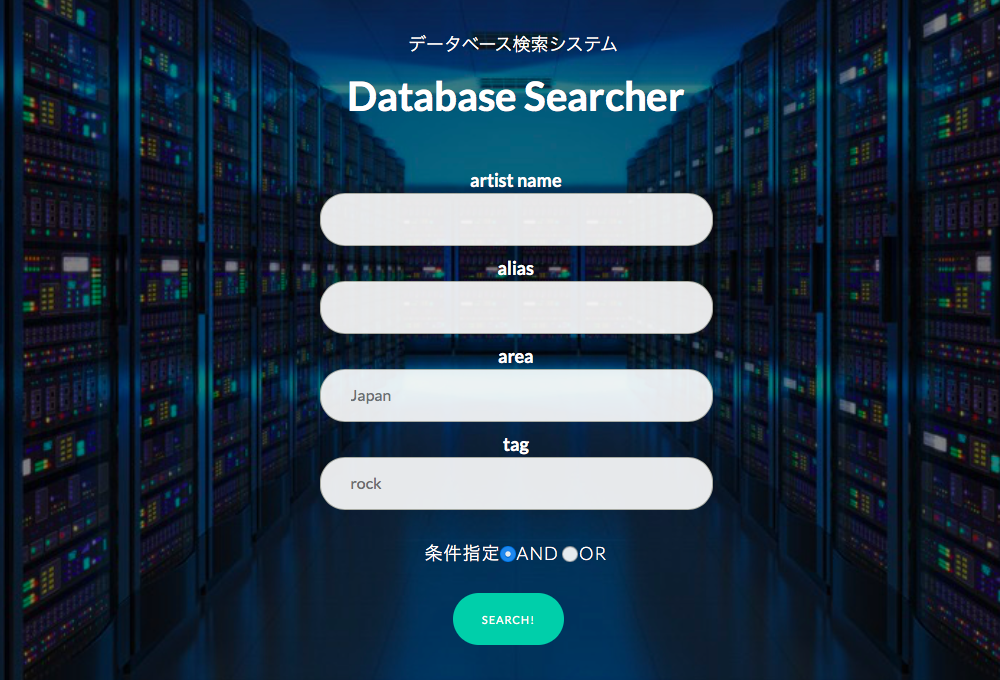

In [110]:
Image('./data/index.png', width=600)

- 検索結果 ~~(力尽きた感)~~

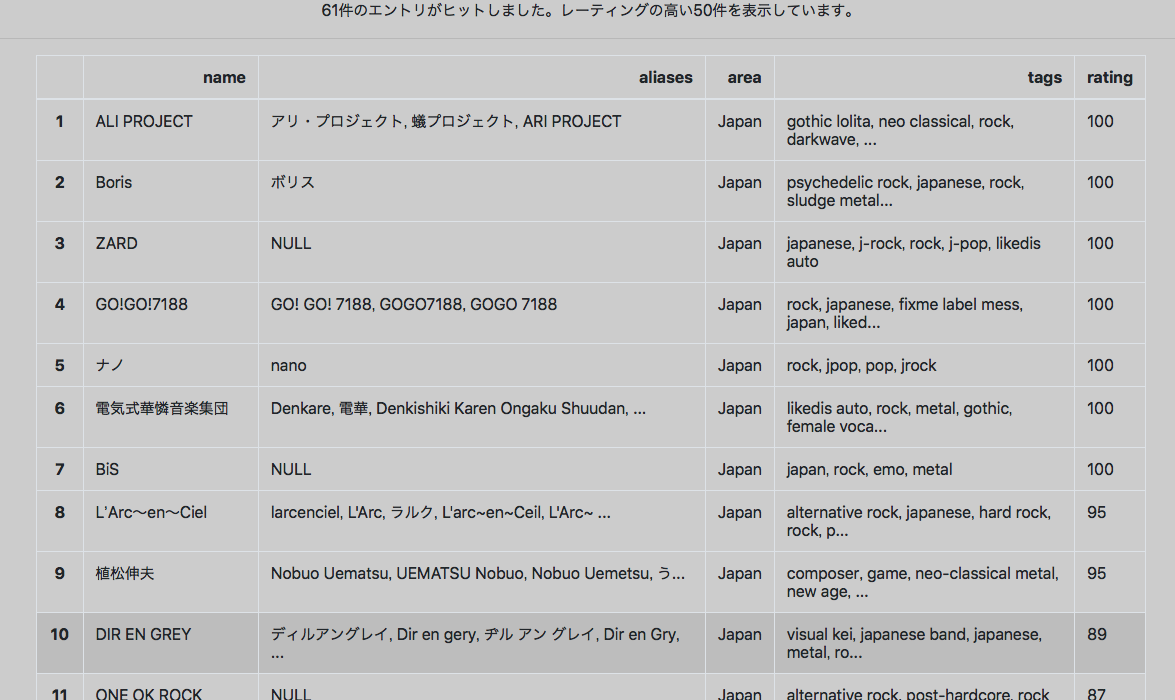

In [111]:
Image('./data/result.png', width=600)